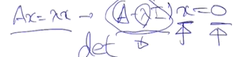

In [2]:
import numpy as np
import numpy.linalg as la
from numpy.linalg import eig
from numpy.linalg import inv

import time

In [20]:
# diagonalization and power of a matrix
A = np.array([[4, 0, -2], [2, 5, 4], [0, 0, 5]])
A

#3x3 matrix

array([[ 4,  0, -2],
       [ 2,  5,  4],
       [ 0,  0,  5]])

In [21]:
eig_val, eig_vec = eig(A)
#numpy 내에 linear algebra pakage
#eigen value / vector를 줌

In [22]:
eig_val

array([ 5.,  4.,  5.])

In [23]:
eig_vec
#5에 해당하는 eigen vector가 0 1 0

array([[ 0.        ,  0.4472136 , -0.89442719],
       [ 1.        , -0.89442719,  0.        ],
       [ 0.        ,  0.        ,  0.4472136 ]])

In [24]:
D = np.diag(eig_val)
D
#벡터로 나온 eigen value값을 diagonal matrix로 변환

array([[ 5.,  0.,  0.],
       [ 0.,  4.,  0.],
       [ 0.,  0.,  5.]])

In [25]:
V = eig_vec
V
#v에 저장

array([[ 0.        ,  0.4472136 , -0.89442719],
       [ 1.        , -0.89442719,  0.        ],
       [ 0.        ,  0.        ,  0.4472136 ]])

In [26]:
V.dot(D).dot(la.inv(V))
#수식 적용

array([[ 4.,  0., -2.],
       [ 2.,  5.,  4.],
       [ 0.,  0.,  5.]])

In [27]:
la.matrix_power(A,5)
#A의 k승

array([[ 1024,     0, -4202],
       [ 4202,  3125,  8404],
       [    0,     0,  3125]])

In [10]:
D_power_5 = np.diag(eig_val**5)
D_power_5
#가운데 diagonal matrix만 element별로 5번의 거듭제곱 
#처음 value는벡터기에 제곱 후 diagonal matrix로 변환

array([[ 3125.,     0.,     0.],
       [    0.,  1024.,     0.],
       [    0.,     0.,  3125.]])

In [11]:
V.dot(D_power_5).dot(la.inv(V))

#수식 대입

array([[ 1024.,     0., -4202.],
       [ 4202.,  3125.,  8404.],
       [    0.,     0.,  3125.]])

In [12]:
#k승을 A에 하는것과 수식 대입하는 것의 속도 차이
# create a matrix A
A = np.array([[4., 4, 2, 3, -2], [0, 1, -2, -2, 2], [6, 12, 11, 2, -4], [9, 20, 10, 10, -6], [15, 28, 14, 5, -3]])

A = A + A.T
A = A/np.expand_dims(np.sum(A, 1), axis = 1)
print (A)

#주어진 matrix A를 백만번 곱하는 연산
# initialize parameters
x = np.random.rand(5)
#x는 랜덤한 5-dimension의 벡터
n_times = 1000000

# perform matrix multiplications
y = x
start_time = time.time()
for i in range(0, n_times):
    y = A.dot(y)
end_time = time.time()
#시간을 잼 / for loop을 백만번 A를 계속 곱해서 y 업데이트
elapse_time = end_time - start_time
print (y)
print (elapse_time)

[[ 0.17777778  0.08888889  0.17777778  0.26666667  0.28888889]
 [ 0.0625      0.03125     0.15625     0.28125     0.46875   ]
 [ 0.12903226  0.16129032  0.35483871  0.19354839  0.16129032]
 [ 0.19672131  0.29508197  0.19672131  0.32786885 -0.01639344]
 [ 0.2826087   0.65217391  0.2173913  -0.02173913 -0.13043478]]
[ 0.51562245  0.51562245  0.51562245  0.51562245  0.51562245]
0.8648059368133545


In [13]:
eig_val, eig_vec = eig(A)
D = np.diag(eig_val)
V = eig_vec
#A를 수식으로 분해할 수 있는 재료 matrix

# perform matrix multiplications using eigendecomposition
start_time = time.time()
y = V.dot((eig_val**n_times)*la.solve(V,x))
#solve: Va = x상수벡터 a를 찾게 함 / V역함수 대신
#matrix, vector내적이나 행렬 곱을 할 때 dot product사용
#여기서 *는 같은 길이의 벡터, 행렬이 있을 때 elemnt별 곱셈 실시
end_time = time.time()
elapse_time = end_time - start_time
print (y)
print (elapse_time)

[ 0.51562245  0.51562245  0.51562245  0.51562245  0.51562245]
0.00035500526428222656
